In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

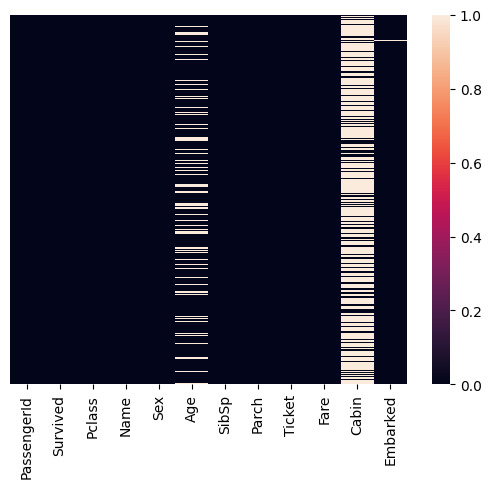

In [7]:
sns.heatmap(df.isnull(),yticklabels=False)

In [8]:
df.drop(columns=["Cabin"],inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Data cleaning**

<Axes: xlabel='Pclass', ylabel='Age'>

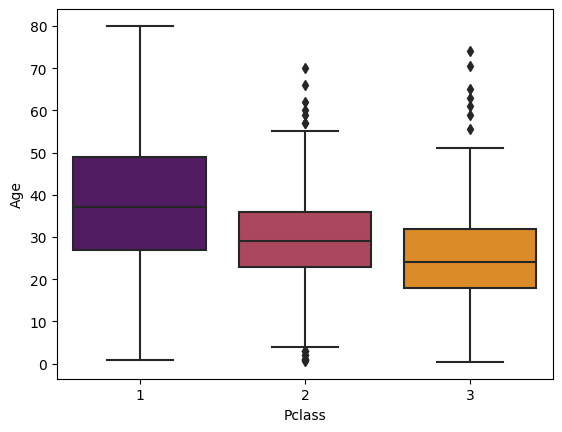

In [10]:
sns.boxplot(x=df.Pclass,y=df.Age,palette="inferno")

<Axes: >

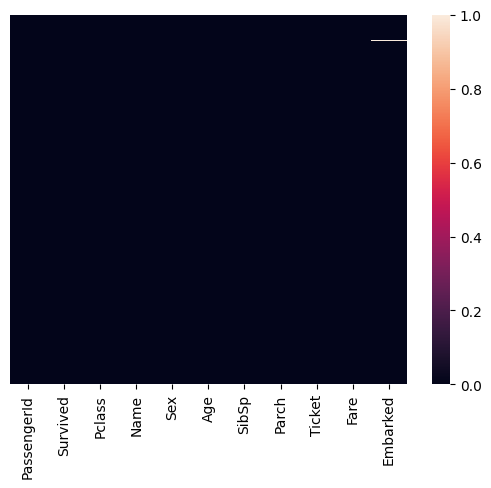

In [25]:
def clean(cols):
  age = cols[0]
  pclass=cols[1]

  if(pd.isnull(age)):

    if(pclass==1):
      return 38
    elif(pclass==2):
      return 30
    else:
      return 22
  else:
    return age

df["Age"] = df[["Age","Pclass"]].apply(clean,axis=1)
sns.heatmap(df.isnull(),yticklabels=False)


<Axes: >

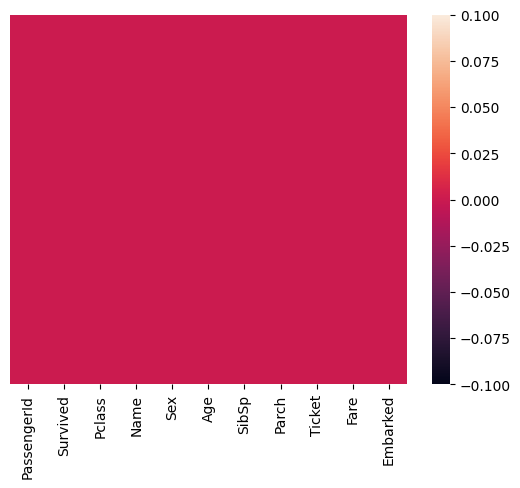

In [27]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False)


# EDA

Text(0.5, 1.0, 'male vs female')

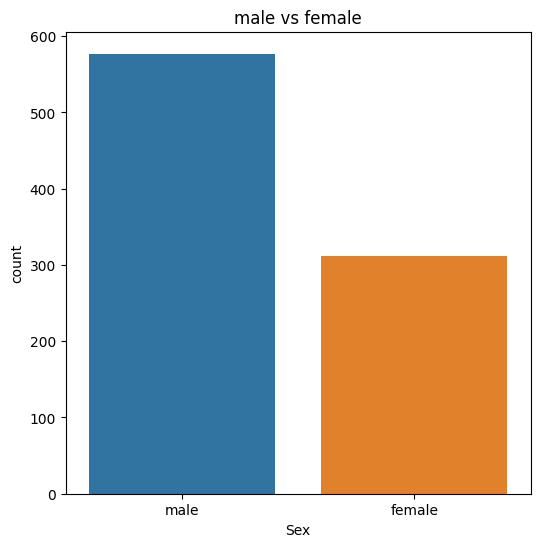

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x=df.Sex)
plt.title("male vs female")

Text(0.5, 1.0, 'male vs female')

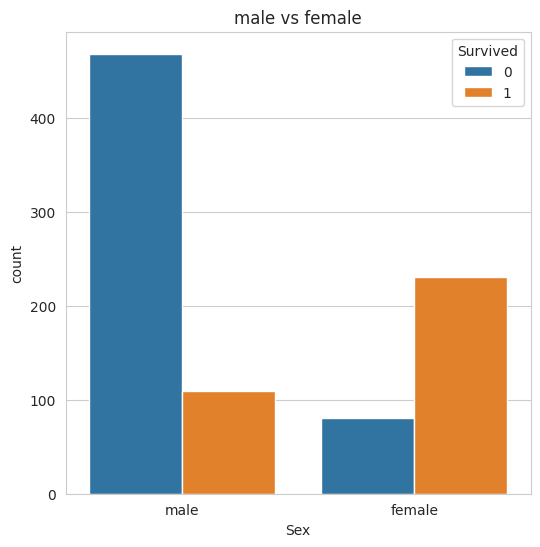

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x=df.Sex,hue=df.Survived)
plt.title("male vs female")

<ipython-input-34-1f84b2c3af03>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,kde=False)


Text(0.5, 1.0, 'Age distribution')

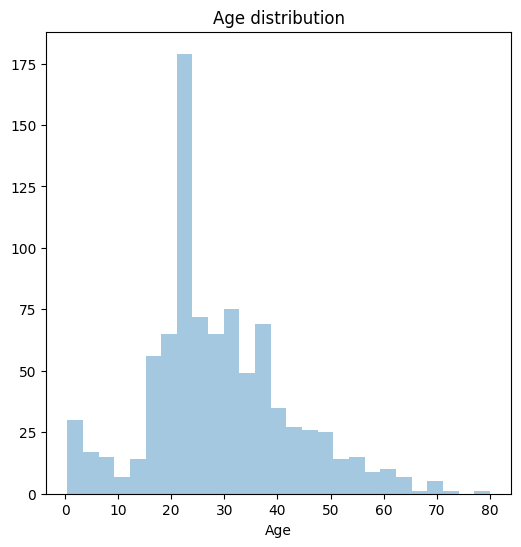

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(df.Age,kde=False)
plt.title("Age distribution")

Text(0.5, 1.0, 'Survival')

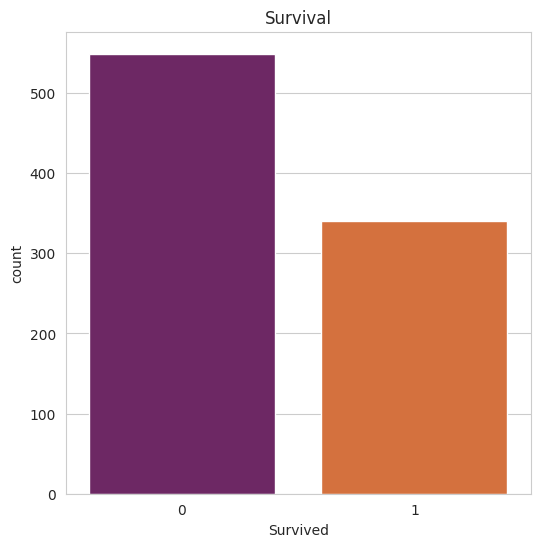

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x="Survived",palette="inferno",data=df)
plt.title("Survival")

Text(0.5, 1.0, 'Survived Sex classify')

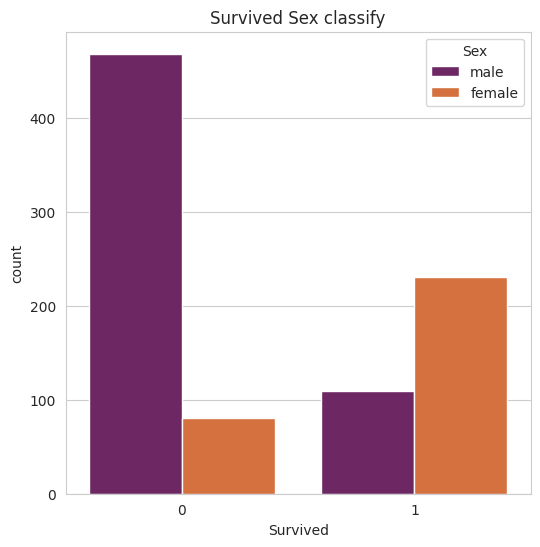

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(x="Survived",palette="inferno",data=df,hue="Sex")
plt.title("Survived Sex classify")

Text(0.5, 1.0, 'Class clasify')

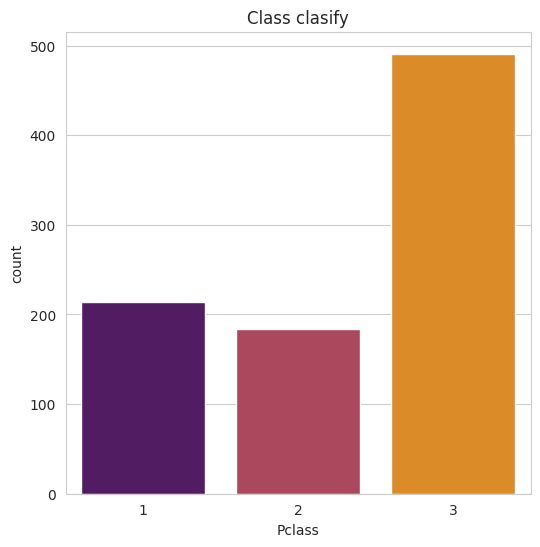

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x="Pclass",palette="inferno",data=df)
plt.title("Class clasify")

Text(0.5, 1.0, 'Travel class sex Classification')

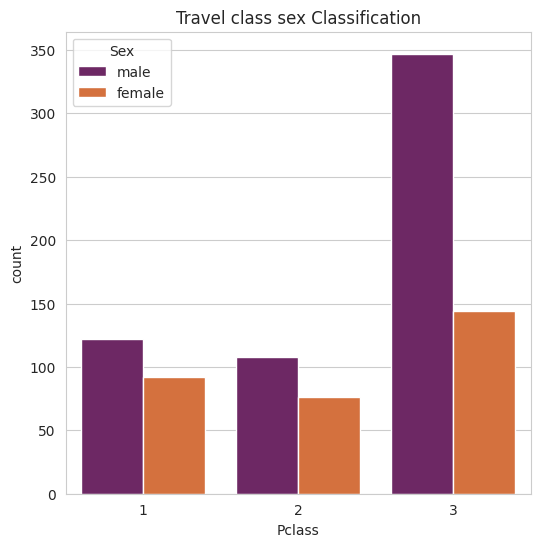

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(x="Pclass",palette="inferno",data=df,hue ="Sex")
plt.title("Travel class sex Classification")

Text(0.5, 1.0, 'Travel class sex Classification')

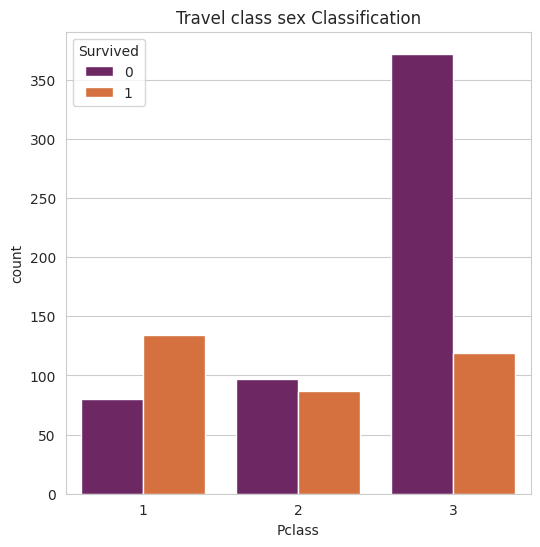

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(x="Pclass",palette="inferno",data=df,hue ="Survived")
plt.title("Travel class sex Classification")

Text(0.5, 1.0, 'Parent Child Column')

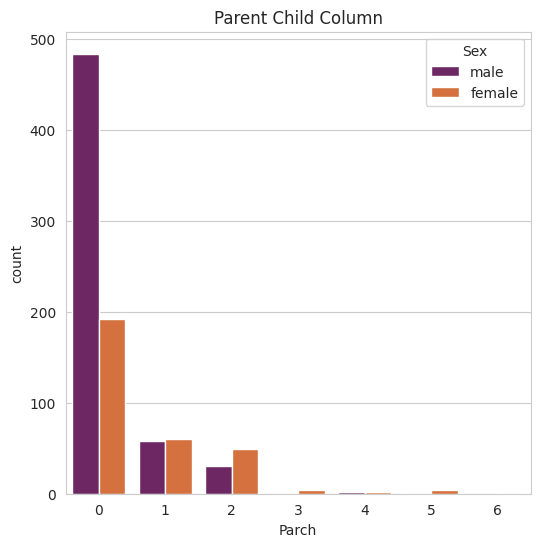

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(x="Parch",palette="inferno",data=df,hue ="Sex")
plt.title("Parent Child Column")

Text(0.5, 1.0, 'Siblings classify')

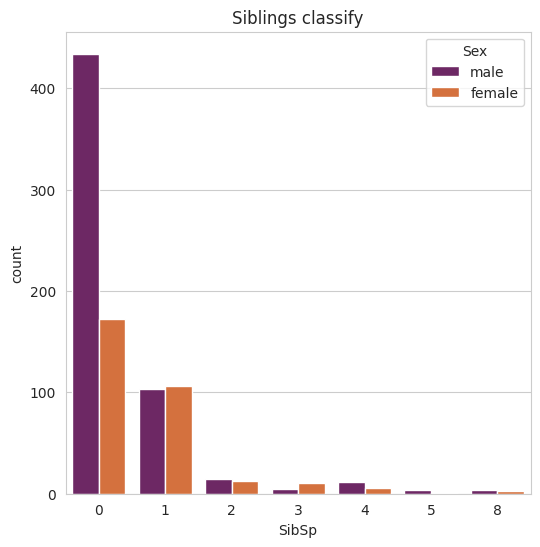

In [59]:
plt.figure(figsize=(6,6))
sns.countplot(x="SibSp",palette="inferno",data=df,hue ="Sex")
plt.title("Siblings classify")

In [61]:
df.drop(columns=["Name","PassengerId"],inplace = True)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [64]:
df.drop(columns=["Ticket"],inplace=True)

# classification

In [65]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df["Embarked"] = la.fit_transform(df.Embarked)
df["Sex"] = la.fit_transform(df.Sex)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 94.8 KB


In [70]:
from sklearn.model_selection import train_test_split

x=df.drop("Survived",axis=1)
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 7)
(223, 7)
(666,)
(223,)


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math

In [94]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(accuracy_score(pred,y_test)*100)

82.95964125560538


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
